# Importamos las librerías

In [ ]:
# Importo librerías de maniupulación de datos
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import gdown

In [ ]:
# Importo librerías de Aprendizaje automático
from sklearn import preprocessing
from sklearn import svm,datasets
from sklearn import linear_model
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR, LinearSVR
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR, LinearSVR
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Importamos el dataframe

In [ ]:
#Importamos el archivo 'airbnb_us', en base al cual realizaremos el análisis.

file_id = '1vDHW4y5QpsMOaXq07VM_6kRrWSaOIFl5'  # Creamos un File ID
file_name = 'airbnb-us_EDA.csv' # Nombramos el archivo
gdown.download(f'https://drive.google.com/uc?id={file_id}', file_name, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1vDHW4y5QpsMOaXq07VM_6kRrWSaOIFl5
To: /content/airbnb-us_EDA.csv
100%|██████████| 27.9M/27.9M [00:00<00:00, 58.4MB/s]


'airbnb-us_EDA.csv'

In [ ]:
# Leemos el archivo con pandas
airbnb_ML_df = pd.read_csv('airbnb-us_EDA.csv')
airbnb_ML_df.head()

print(f'np.shape --> {np.shape(airbnb_ML_df)}')

filas = np.shape(airbnb_ML_df)[0] # [0] para la primera dimension
print(f'Filas: {filas}')

columnas = np.shape(airbnb_ML_df)[1] # [1] para la segunda dimension
print(f'Columnas: {columnas}')

print('Output de ".head(5)": ')
airbnb_ML_df.head(5)

np.shape --> (17866, 79)
Filas: 17866
Columnas: 79
Output de ".head(5)": 


<ipython-input-207-bff03ed94352>:2: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  airbnb_ML_df = pd.read_csv('airbnb-us_EDA.csv')


,id,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,...,Air / Heating,EV charger,Smoking,Pet Friendly,Work,Internet,Accesibility,Coastal,Essentials,Room essentials
0,3808709,Apartment,Entire home/apt,"{TV,Internet,""Internet"",""Air / Air / Heating"",...",2,1.0,Real Bed,moderate,True,DC,...,True,False,False,False,False,True,True,False,True,False
1,12422935,Apartment,Private room,"{TV,""Internet"",Air / Heating,""Safety"",""Safety""...",2,1.0,Real Bed,strict,True,SF,...,True,False,False,False,True,True,False,False,True,True
2,180792,House,Private room,"{TV,""TV"",""Internet"",""Pet Friendly"",Pet Friendl...",2,1.0,Real Bed,moderate,True,SF,...,True,False,False,True,False,True,False,False,True,True
3,2658946,Apartment,Entire home/apt,"{TV,""TV"",Internet,""Internet"",""Air / Air / Heat...",6,1.5,Real Bed,strict,True,DC,...,True,False,False,False,True,True,False,False,True,True
4,6226658,Apartment,Private room,"{Internet,""Internet"",""Air / Air / Heating"",Kit...",2,1.5,Real Bed,moderate,True,Chicago,...,True,False,False,False,True,True,False,False,True,True


In [ ]:
airbnb_ML_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17866 entries, 0 to 17865
Data columns (total 79 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                17866 non-null  int64  
 1   property_type                     17866 non-null  object 
 2   room_type                         17866 non-null  object 
 3   amenities                         17866 non-null  object 
 4   accommodates                      17866 non-null  int64  
 5   bathrooms                         17866 non-null  float64
 6   bed_type                          17866 non-null  object 
 7   cancellation_policy               17866 non-null  object 
 8   cleaning_fee                      17866 non-null  bool   
 9   city                              17866 non-null  object 
 10  description                       17866 non-null  object 
 11  host_identity_verified            17866 non-null  bool   
 12  host

In [ ]:
# Filtrar las columnas numéricas
airbnb_df_numeric = airbnb_ML_df.select_dtypes(include=['int64','float64','bool'])

In [ ]:
airbnb_df_numeric.head()

,id,accommodates,bathrooms,cleaning_fee,host_identity_verified,instant_bookable,latitude,longitude,number_of_reviews,review_scores_rating,...,Air / Heating,EV charger,Smoking,Pet Friendly,Work,Internet,Accesibility,Coastal,Essentials,Room essentials
0,3808709,2,1.0,True,True,True,38.925627,-77.034596,4,40.000000,...,True,False,False,False,False,True,True,False,True,False
1,12422935,2,1.0,True,True,True,37.753164,-122.429526,3,100.000000,...,True,False,False,False,True,True,False,False,True,True
2,180792,2,1.0,True,False,False,37.781128,-122.501095,159,99.000000,...,True,False,False,True,False,True,False,False,True,True
3,2658946,6,1.5,True,True,True,38.919630,-77.031189,13,89.000000,...,True,False,False,False,True,True,False,False,True,True
4,6226658,2,1.5,True,True,False,41.908240,-87.695242,0,94.714908,...,True,False,False,False,True,True,False,False,True,True


In [ ]:
# Separamos las columnas numéricas y categóricas
numerical_cols = ['beds','bedrooms','bathrooms','Enc_room_type','Kids','TV','Accesibility','Gym']

categorical_cols = ['property_type', 'room_type', 'cancellation_policy', 'city', 'zipcode',
                    'neighbourhood', 'bed_type', 'host_since']

# Preprocesamiento de datos
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Rellenar valores nulos con la media
    ('scaler', StandardScaler())  # Escalar las variables numéricas
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Rellenar valores nulos con el valor más frecuente
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # Codificar las variables categóricas
])

# Combina ambos preprocesadores
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ]
)

# Preparamos el dataframe
X = airbnb_df_numeric.drop(columns=['price', 'id'])  # Eliminamos la variable objetivo (price) y la columna id
y = airbnb_df_numeric['price']  # Variable objetivo

# Dividimos los datos en conjunto de entrenamiento y conjunto de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
y = np.array(airbnb_ML_df["price"])
x = airbnb_df_numeric.drop(['id','price'], axis=1)

print(f'Dimensiones de X: {x.shape}')
print(f'Dimensiones de y: {y.shape}')

Dimensiones de X: (17866, 67)
Dimensiones de y: (17866,)


In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.2, random_state = 42)
print("xtrain:",xtrain.shape)
print("xtest:",xtest.shape)
print("ytrain:",ytrain.shape)
print("ytest:",ytest.shape)

xtrain: (14292, 67)
xtest: (3574, 67)
ytrain: (14292,)
ytest: (3574,)


In [ ]:
#Hacmemos el autoscaling con los datos de train para evitar pasarle al modelo datos de test.
scaler = preprocessing.StandardScaler().fit(xtrain)

In [ ]:
#Determinamos los nuevos valores de x, en funcion de las nuevas mu y sigma definidas en la linea anterior
xtrain_scal = scaler.transform(xtrain)

#Imprimimos la media y el desvio obtenidos, los cuales tomaran valores de 0 y 1 respectivamente
print(xtrain_scal.mean(axis=0))
print(xtrain_scal.std(axis=0))

[ 1.02415200e-16  2.10796334e-16  0.00000000e+00  1.12855584e-16
 -3.18183145e-17  2.86563695e-15 -2.02593174e-17 -3.97728931e-18
 -1.67543312e-16  7.65628193e-17  9.94322328e-17  4.47445048e-17
 -1.69034796e-17 -3.33097980e-17 -7.55684969e-17 -2.33665747e-17
  2.23722524e-17 -2.08807689e-17  1.19318679e-17  1.14347068e-17
 -3.48012815e-18  9.94322328e-18  0.00000000e+00  1.98864466e-17
 -1.74006407e-17 -2.58523805e-17 -3.97728931e-18 -2.98296698e-18
  4.97161164e-18 -3.48012815e-18 -5.46877281e-17  0.00000000e+00
 -3.97728931e-18  9.94322328e-19 -1.49148349e-17 -3.08239922e-17
 -2.98296698e-18 -1.98864466e-18 -9.94322328e-19  3.97728931e-18
  8.94890095e-18  8.10372698e-17  7.95457863e-18  2.29937038e-17
 -2.04581819e-16  3.23154757e-17 -1.21307324e-16  8.45173979e-17
  4.42473436e-17 -9.94322328e-19 -3.82814096e-17 -1.18821518e-16
 -4.74788912e-17 -9.94322328e-19 -2.48580582e-18 -1.31499128e-16
 -2.98296698e-17 -1.29261903e-17 -1.98864466e-18  1.29261903e-17
 -9.94322328e-19 -2.32422

In [ ]:
#Adaptamos las muestras de test con los el scaler ajustado a los datos de train - no volvemos a aprender un nuevo scaler -
xtest_scal = scaler.transform(xtest)

#Imprimimos la media y el desvio estandard
print(xtest_scal.mean(axis=0))
print(xtest_scal.std(axis=0))

[ 2.63443695e-03  1.39518319e-02  0.00000000e+00  1.30036895e-02
  2.02416053e-02 -1.26880600e-02 -2.85918601e-02  1.06592208e-02
 -1.92750183e-02  5.74091795e-03 -5.38725093e-04 -2.16237119e-02
 -5.43859761e-03  8.33416928e-03  8.37626467e-03  3.11817256e-02
  9.58852726e-03 -1.39081120e-03  8.35803047e-03  2.61778608e-02
 -1.67318620e-02  3.54779149e-02 -8.36505287e-03  1.22706669e-02
 -3.06956644e-03  7.09161475e-03  2.27804871e-02 -1.16103099e-02
 -2.13340280e-02 -2.51002484e-02 -2.90096535e-05 -7.75573863e-03
  2.50857965e-02 -8.36505287e-03  8.71421558e-03 -2.70226469e-03
 -8.36505287e-03  2.50857965e-02 -8.36505287e-03 -2.77534535e-02
 -1.18303851e-02  3.65731733e-03 -2.21364970e-02 -2.36922730e-02
  5.68449538e-03 -7.52099831e-03 -3.75722782e-03 -6.77705731e-05
  2.38970961e-02  7.15948890e-03 -4.47950151e-03  7.71006590e-03
 -1.26027086e-02  1.39574267e-02 -1.67318620e-02  3.05163134e-03
  2.85078850e-02  1.40000506e-02 -1.01566158e-02  2.70751644e-02
 -1.78216700e-02 -1.23852

# Linear Regression

In [ ]:
lr = LinearRegression()

In [ ]:
lr.fit(xtrain_scal, ytrain)
ypred = lr.predict(xtest_scal)

In [ ]:
# Calcular el MSE
mse = mean_squared_error(ytest, ypred).__round__(4)

# Calcular el RMSE
rmse = np.sqrt(mse).__round__(4)

# Imprimir ambos resultados
print(f'El MSE en el conjunto de prueba es: {mse}')
print(f'El RMSE en el conjunto de prueba es: {rmse}')


El MSE en el conjunto de prueba es: 5941.5424
El RMSE en el conjunto de prueba es: 77.0814


# Principal Component Analisys (PCA)

In [ ]:
# Realizamos un autoscaling con los datos, para todas las features
scaler = StandardScaler().fit(x)
xscal = scaler.transform(x)

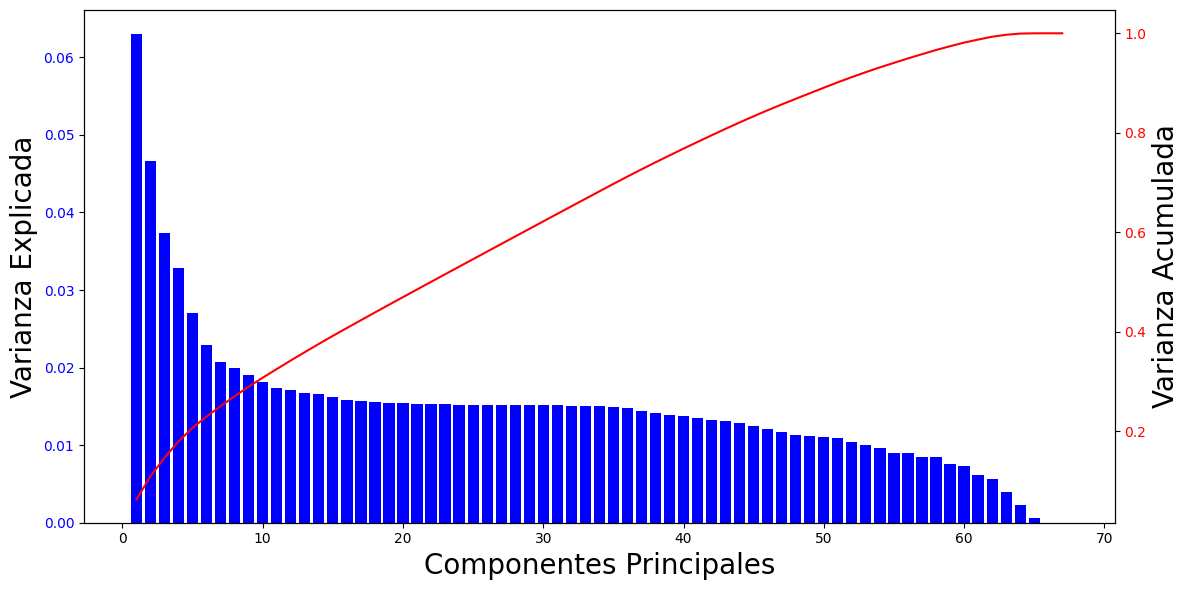

In [ ]:
# Definimos la cantidad de componentes
n_comps = 67
components = range(1,n_comps + 1)
#Creamos el objeto PCA
pca = PCA(n_components=n_comps)

# Ajustamos
pca.fit(xscal)
# Transformamos
xpca = pca.transform(xscal)

# Porcentaje de la varianza explicada por cada Principal Component (PC)
eigenvalues_acum = eigenvalues.cumsum()

# Suma acumulada
eigenvalues_acum = pca.explained_variance_ratio_.cumsum()

# Graficamos
# Eje Izquierdo
fig, ax1 = plt.subplots(figsize=(12,6))
ax1.set_xlabel('Componentes Principales',fontsize=20)
ax1.set_ylabel('Varianza Explicada', color='k',fontsize=20)
ax1.bar(components, eigenvalues, color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Eje derecho
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Varianza Acumulada', color='k',fontsize=20)
ax2.plot(components, eigenvalues_acum, color='red')
ax2.tick_params(axis='y', labelcolor='red')

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

In [ ]:
# Determinar cuántos componentes explicarían el 95% de la varianza
n_comps_95 = next(i for i, v in enumerate(eigenvalues_acum) if v >= 0.95) + 1
print(f"Número de componentes para explicar el 95% de la varianza: {n_comps_95}")

Número de componentes para explicar el 95% de la varianza: 57


In [ ]:
# Dividir en conjunto de entrenamiento y prueba
X_train_pca, X_test_pca, y_train, y_test = train_test_split(xpca, y, test_size=0.15, random_state=15)

# Crear y entrenar el modelo de regresión
regression_model = LinearRegression()
regression_model.fit(X_train_pca, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred = regression_model.predict(X_test_pca)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse).__round__(4)

# Mostrar resultados
print(f"Error cuadrático medio (MSE): {mse}")
print(f"Coeficiente de determinación (R²): {r2}")
print(f'El RMSE en el conjunto de prueba es: {rmse}')

# Información adicional sobre PCA
explained_variance = np.cumsum(pca.explained_variance_ratio_)
print(f"Varianza explicada acumulada: {explained_variance}")

Error cuadrático medio (MSE): 5748.099079325417
Coeficiente de determinación (R²): 0.4418854177259578
El RMSE en el conjunto de prueba es: 75.8162
Varianza explicada acumulada: [0.06296039 0.10955676 0.14689057 0.17978648 0.20685824 0.22972828
 0.2505006  0.27049399 0.2895561  0.30766955 0.32507493 0.34224006
 0.35900127 0.37560231 0.39179128 0.407554   0.42324558 0.43879787
 0.45427999 0.46968147 0.48500969 0.50032155 0.515569   0.53080126
 0.54601986 0.56123459 0.57641282 0.59158155 0.60674652 0.6219066
 0.63705404 0.65216337 0.66724955 0.68227652 0.69725872 0.71201938
 0.72646535 0.74061962 0.75447933 0.76821685 0.78165651 0.79490677
 0.80804074 0.82083804 0.83324923 0.84535221 0.85701168 0.86826992
 0.879507   0.89061198 0.90153884 0.91194771 0.92197421 0.93154722
 0.94056698 0.94951275 0.95798012 0.96640932 0.97400319 0.98128911
 0.98743741 0.99312178 0.99706987 0.99940778 1.         1.
 1.        ]


Luego de aplicar PCA, notamos que el MSE ha disminuido, aunque no sea en magnitudes del orden más representativas

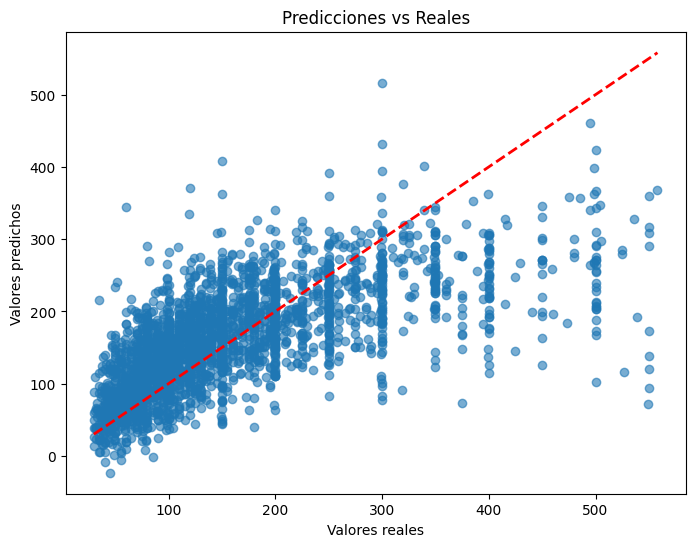

In [ ]:
# Comparar valores predichos vs valores reales
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Valores reales")
plt.ylabel("Valores predichos")
plt.title("Predicciones vs Reales")
plt.show()

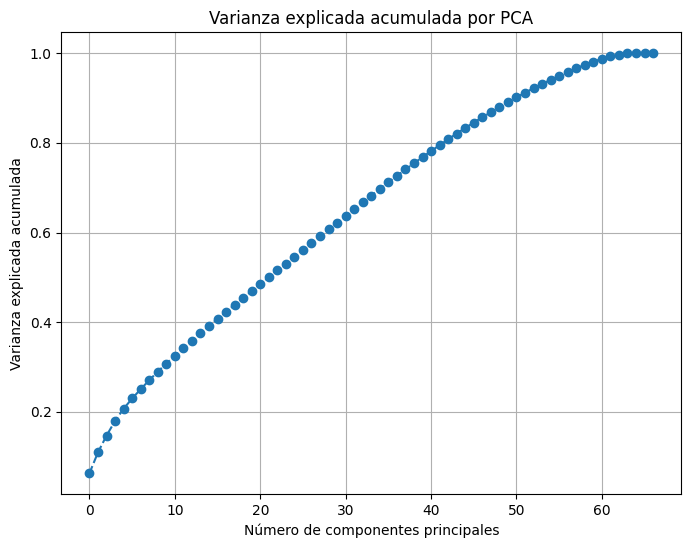

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(explained_variance, marker='o', linestyle='--')
plt.xlabel('Número de componentes principales')
plt.ylabel('Varianza explicada acumulada')
plt.title('Varianza explicada acumulada por PCA')
plt.grid()
plt.show()

In [ ]:
# Coeficientes del modelo de regresión
coefficients = regression_model.coef_
print("Coeficientes del modelo:")
for i, coef in enumerate(coefficients, start=1):
    print(f"Componente principal {i}: {coef}")

Coeficientes del modelo:
Componente principal 1: 20.091566352096386
Componente principal 2: -6.336870320169283
Componente principal 3: -18.72791572158807
Componente principal 4: -21.153376001950427
Componente principal 5: 8.452990824161123
Componente principal 6: -4.355314265885971
Componente principal 7: -6.3473151911059045
Componente principal 8: -8.492712976975888
Componente principal 9: 5.088748428128194
Componente principal 10: 11.4781222152668
Componente principal 11: -1.8757152721340447
Componente principal 12: 4.040717885728384
Componente principal 13: 0.5025924647035254
Componente principal 14: 3.1788444150469672
Componente principal 15: -5.05108485548385
Componente principal 16: 1.1155805236882657
Componente principal 17: -0.46924705898868524
Componente principal 18: -1.5484703069387251
Componente principal 19: -0.49345098401045107
Componente principal 20: 2.5162631806852005
Componente principal 21: -1.0130218887788942
Componente principal 22: -0.46255449013551697
Componente 

In [ ]:
from sklearn.metrics import mean_absolute_error

# Error absoluto medio
mae = mean_absolute_error(y_test, y_pred)
print(f"Error absoluto medio (MAE): {mae}")

Error absoluto medio (MAE): 53.798375636065764


# Linear Regression con PCA

In [ ]:
# Crear el modelo de regresión lineal
lr = LinearRegression()

# Ajustar el modelo con los datos de entrenamiento
lr.fit(X_train_pca, y_train)

# Hacer predicciones con los datos de prueba
y_pred = lr.predict(X_test_pca)

# Evaluar el modelo usando MAE
mae = mean_absolute_error(y_test, y_pred)
print(f"Error Absoluto Medio (MAE): {mae}")

# Evaluar el modelo usando MSE
mse = mean_squared_error(y_test, y_pred)
print(f"Error Cuadrático Medio (MSE): {mse}")

# Evaluar el modelo usando RMSE
rmse = np.sqrt(mse)
print(f"Raíz del Error Cuadrático Medio (RMSE): {rmse}")

Error Absoluto Medio (MAE): 53.798375636065764
Error Cuadrático Medio (MSE): 5748.099079325417
Raíz del Error Cuadrático Medio (RMSE): 75.81621910465739


# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Crear el modelo de Random Forest
rf = RandomForestRegressor(n_estimators=200, random_state=42)

# Ajustar el modelo con los datos de entrenamiento
rf.fit(X_train_pca, y_train)

# Hacer predicciones con los datos de prueba
y_pred_rf = rf.predict(X_test_pca)

# Evaluar el modelo usando MAE
mae_rf = mean_absolute_error(y_test, y_pred_rf)
print(f"Error Absoluto Medio (MAE) - Random Forest: {mae_rf}")

# Evaluar el modelo usando MSE
mse_rf = mean_squared_error(y_test, y_pred_rf)
print(f"Error Cuadrático Medio (MSE) - Random Forest: {mse_rf}")

# Evaluar el modelo usando RMSE
rmse_rf = np.sqrt(mse_rf)
print(f"Raíz del Error Cuadrático Medio (RMSE) - Random Forest: {rmse_rf}")


Error Absoluto Medio (MAE) - Random Forest: 52.801408582089564
Error Cuadrático Medio (MSE) - Random Forest: 5734.7246146175385
Raíz del Error Cuadrático Medio (RMSE) - Random Forest: 75.72796454822709


# Grid Search

In [ ]:
# Definir el modelo base
rf = RandomForestRegressor(random_state=42)

# Definir el grid de hiperparámetros
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Configurar el GridSearchCV
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=3,  # Validación cruzada de 3 folds
    scoring='neg_mean_squared_error',  # Optimizar MSE
    verbose=2,
    n_jobs=-1  # Usar todos los núcleos disponibles
)

# Ajustar el Grid Search a los datos
grid_search.fit(X_train_pca, y_train)

# Mejor modelo encontrado
best_rf = grid_search.best_estimator_

# Evaluar el mejor modelo en el conjunto de prueba
y_pred_best_rf = best_rf.predict(X_test_pca)
mse_best_rf = mean_squared_error(y_test, y_pred_best_rf)
rmse_best_rf = np.sqrt(mse_best_rf)

print(f"Mejor combinación de hiperparámetros: {grid_search.best_params_}")
print(f"RMSE del mejor modelo: {rmse_best_rf}")


Fitting 3 folds for each of 81 candidates, totalling 243 fits
